Revisão para a prova

In [1]:
import numpy as np
from math import factorial

from scipy import stats

**1)** Suponha que o número de meteoros encontrados por um sistema de radar em qualquer intervalo de 30 segundos sob determinadas condições é em média 1,81. Assuma que os meteoros apareçam aleatoriamente e independentemente. 

Usando a distribuição de Poisson, determine:

a)	A probabilidade de que nenhum meteoro seja encontrado em um intervalo de 1 minuto

b)	A probabilidade de que sejam observados no mínimo cinco porém não mais que oito meteoros em dois minutos de observação

**Resolução**<br>
Modelo de distribuição de Poisson: 

\\[ P(X=k) = \frac{e^{-\lambda}\lambda^{k}}{k!} \\]

onde lambda é a taxa de ocorrência

In [2]:
def func_poisson(lbd, k):
    return np.exp(-lbd)*(lbd**k)/factorial(k)


# a)
lbd = (1.81 * 60)/30  # taxa em minuto
k = 0  # frequência procurada

# probabilidade

print('P(k=0) = ', round(func_poisson(lbd, k)*100, 2), '%') # probabilidade de nenhum meteoro passar em um intervalo de 1 minuto

P(k=0) =  2.68 %


In [6]:
# b)
lbd = 1.81 * 120 / 30  # taxa em 2 minutos

# k = 5, k = 6, k=7, k=8

k = 5
print('P(k=5) = ', round(func_poisson(lbd, k) * 100, 2), '%')
k = 6
print('P(k=6) = ', round(func_poisson(lbd, k) * 100, 2), '%')
k = 7
print('P(k=7) = ', round(func_poisson(lbd, k) * 100, 2), '%')
k = 8
print('P(k=8) = ', round(func_poisson(lbd, k) * 100, 2), '%')

# Resposta
print("")
print(
    'P(5 <= k <=8) = ',
    round(func_poisson(lbd, 5) * 100, 2) +
    round(func_poisson(lbd, 6) * 100, 2) +
    round(func_poisson(lbd, 7) * 100, 2) +
    round(func_poisson(lbd, 8) * 100, 2), '%')

P(k=5) =  11.89 %
P(k=6) =  14.35 %
P(k=7) =  14.84 %
P(k=8) =  13.43 %

P(5 <= k <=8) =  54.51 %


In [7]:
# resolvendo com o for

prob = 0
for k in range(5, 9):
    prob = prob + round(func_poisson(lbd, k)*100, 2)

print('P(5<= k <=8) = ', prob, '%')

P(5<= k <=8) =  54.51 %


In [8]:
# OUTRA FORMA DE RESOLVER

from scipy import stats

# X~Poisson(k*lambda)

# a)
# P(X = 0| lambda = 2*1.81)
k = 0 # freq procurada
lbd = 1.81 * 60 / 30

rv = stats.poisson(lbd)
rv.pmf(k)

0.026782676492638175

**2**) Suponha que a probabilidade dos pais  terem um  filho(a) com cabelos loiros seja $\frac{1}{4}$. Se houverem 6 crianças na 
família, qual é a probabilidade de que metade delas terem cabelos loiros? Resolva pela distribuição binomial.

Resolução:

\\[P(A) = \sum P(\{ (e_1,\dotsc,e_N) \})  =  \binom{N}{k} \cdot p^kq^{N-k}\\]

onde p é a probabilidade de sucesso, q é a probabilidade de insucesso, k é a frequencia observada

In [9]:
p = 1/4  # probabilidade de sucesso

n = 6  # número de filhos

k = 3  # frequencia observada, procurada

q = 1 - p  # probabilidade de insucesso

In [10]:
def func_binomial(n, p, k):
    C = factorial(n) / (factorial(n - k) * factorial(k))
    return C * np.power(p, k) * np.power(1 - p, n - k)


print('Probabilidade: ', round(func_binomial(n, p, k) * 100, 2),'%')  #Probabilidade da metade das crianças serem loiras

Probabilidade:  13.18 %


In [11]:
# outra forma de resolver

# X~Bin(6,1/4)
#P(X = 3)
rv = stats.binom(n, p)
rv.pmf(k)

0.13183593749999992

**3)** Se a probabilidade de atingir um alvo num único disparo é 0,3, qual é a probabilidade de que em 4 disparos o alvo seja atingido no mínimo 3 vezes? Resolva pela distribuição binomial

In [12]:
p = 0.3

n = 4

# k >= 3 _> ele pode ser 3 ou 4

print('Probabilidade k = 3: ', round(func_binomial(n, p, 3) * 100, 2), '%')
print('Probabilidade k = 4: ', round(func_binomial(n, p, 4) * 100, 2), '%')

print(
    'Probabilidade k >= 3: ',
    round(func_binomial(n, p, 3) * 100, 2) +
    round(func_binomial(n, p, 4) * 100, 2), '%')

Probabilidade k = 3:  7.56 %
Probabilidade k = 4:  0.81 %
Probabilidade k >= 3:  8.37 %


In [13]:
# usando o for para fazer a somatória

prob = 0
for k in range(3, 5):
    prob += round(func_binomial(n, p, k) * 100, 2)

print('Probabilidade k >= 3: ', prob, '%')

Probabilidade k >= 3:  8.37 %


In [14]:
# outra forma de resolver

n = 4
p = 0.3
k = 3

rv = stats.binom(n, p)
rv.pmf(k)

0.0756

**4**) Alberto diz que pode prever o futuro das colheitas. A comunidade em que ele vive, interessadíssima nesses poderes, se mobilizou para verificar o fato. Foi averiguado que ele acerta 80% das vezes em que diz que os tomates não vão germinar e 90% das vezes em que diz que os tomates vão germinar. Os tomates não germinam em 10% das colheitas. Se Alberto anunciar a perda da colheita, qual é a probabilidade real de que eles não germinem?

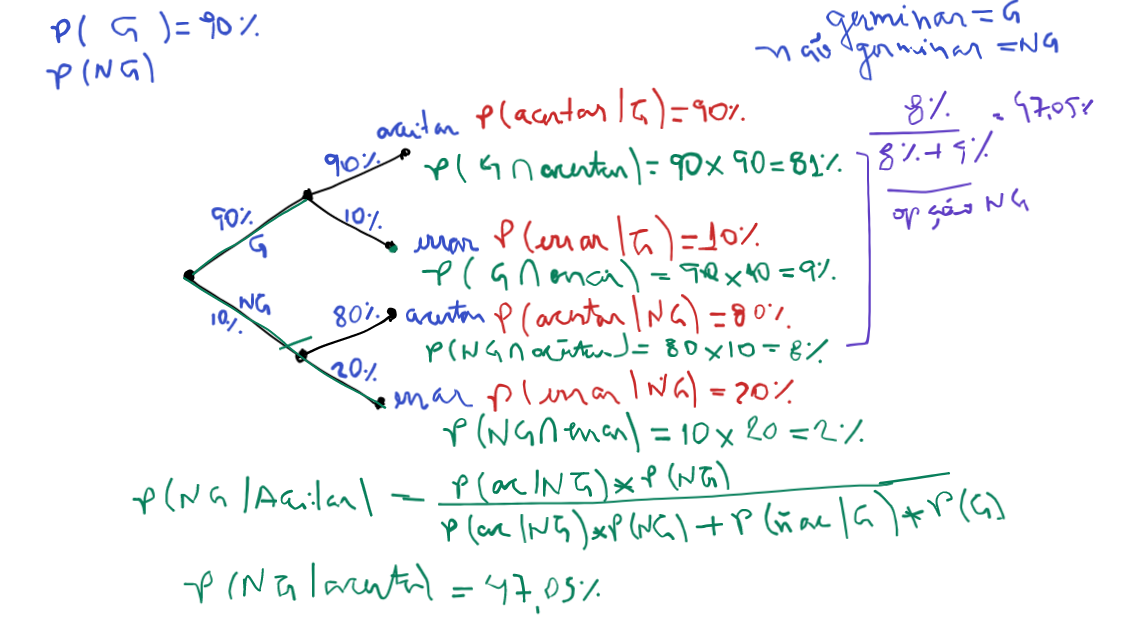

**5**) A concentração de um poluente em água liberada por uma fábrica tem distribuição N~(8,1.5). Qual a chance, de que num dado dia, a concentração do poluente exceda o limite regulatório de 10 ppm?

**Resolução**
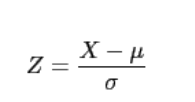

In [2]:
from scipy import stats

mu = 8
sigma = 1.5

X = 10

z = (X - mu)/sigma
print('Z: ',z)  # valor padronizado

# olhar na tabela, porém podemos calcular diretamente

print('Probabilidade = ', round((1-stats.norm.cdf(z))*100, 2), '%')

Z:  1.3333333333333333
Probabilidade =  9.12 %


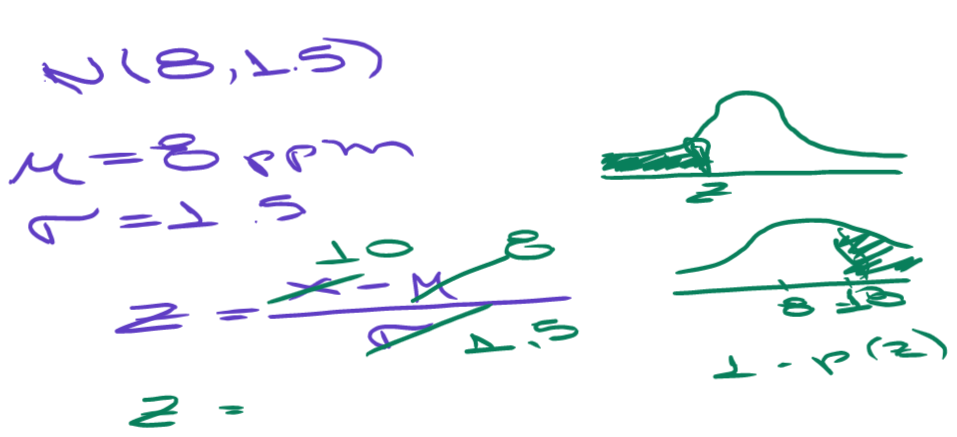

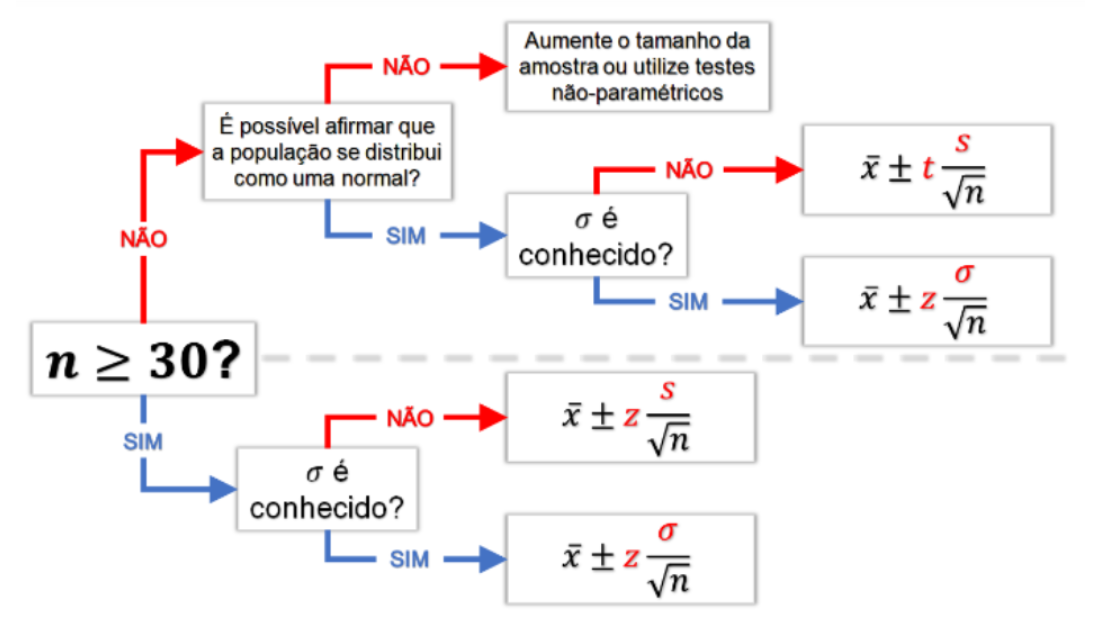

**6**) Dada uma variável randômica X e uma distribuição normal com mu = 50 e sigma = 10, encontre a probabilidade de X assumir valores entre 45 e 62

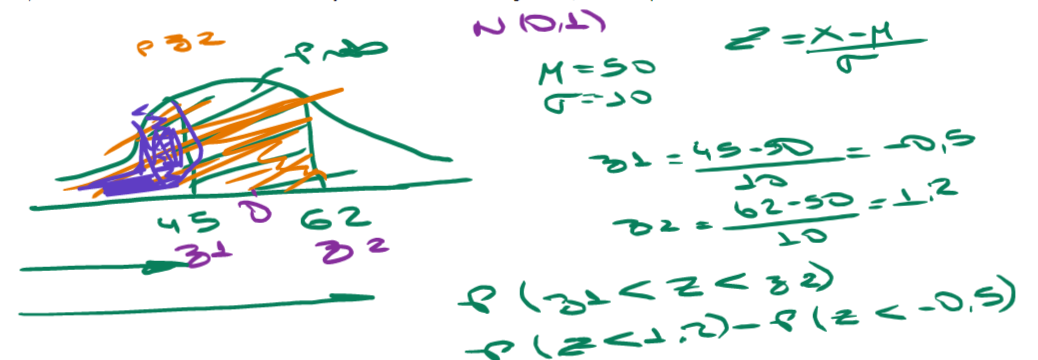

In [3]:
mu = 50
sigma = 10

z1 = (45 - mu) / sigma
z2 = (62 - mu) / sigma

print('Z score para o valor 45:', z1)

print('Z score para o valor 62:', z2)

# olhar na tabela ou usar a formula abaixo
print('Probabilidade de X assumir valor entre 45 e 62:', round((stats.norm.cdf(z2) - stats.norm.cdf(z1)) * 100, 2), '%')

Z score para o valor 45: -0.5
Z score para o valor 62: 1.2
Probabilidade de X assumir valor entre 45 e 62: 57.64 %


**7)** Jane iniciou um novo trabalho como representante de vendas numa empresa extremamente competitiva, ao ponto de exigirem que novos colaboradores batem uma meta de 100 reais por contrato. Numa amostra coletada pela gerente de Jane de 16 vendas, observou-se que a média de valor fechado nos contratos foi de 108 reais com um desvio de 12 reais. Considerando uma confiança de 95%, a gerente poderia seguir com a contratação da Jane ou ela precisaria ser desligada de acordo com as políticas da empresa?

In [9]:
n = 16
media_amostra = 108
desvio_padrao = 12
mu = 100
confianca = 0.95
significancia = 1 - confianca


tc = (media_amostra - mu)/(desvio_padrao/np.sqrt(n))
tc

2.6666666666666665

In [10]:
from scipy.stats import t as t_student

n = 16
graus_de_liberdade = n - 1

t_alpha = t_student.ppf(confianca, df=graus_de_liberdade)
t_alpha

1.7530503556925547

### Teste bicaudal vs unicaudal


<img src="https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img002.png" weight=50%>

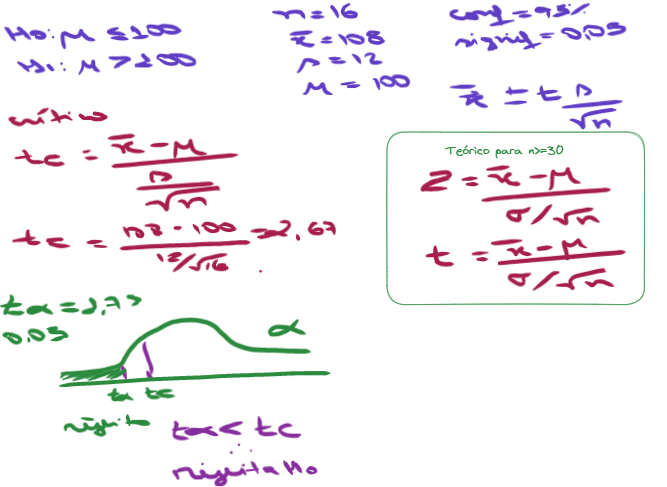

Como t_alpha é menor que tc, rejeita-se a hipótese nula.

Portanto Jane vai ser contratada porque ela atinge a meta de 100 reais 95% das vezes

**8**) Uma urna contém duas bolas brancas (B) e três bolas vermelhas (V). Suponha que são sorteadas duas bolas ao acaso, sem reposição. Isso significa que escolhemos a primeira bola, verificamos sua cor e não a devolvemos à urna. Misturamos as bolas restantes e retiramos a segunda. Qual a probabilidade de sair bola branca na segunda extração. Dado que na primeira extração foi retirada uma bola branca (B), qual a probabilidade da segunda extração ser da bola vermelha (V).

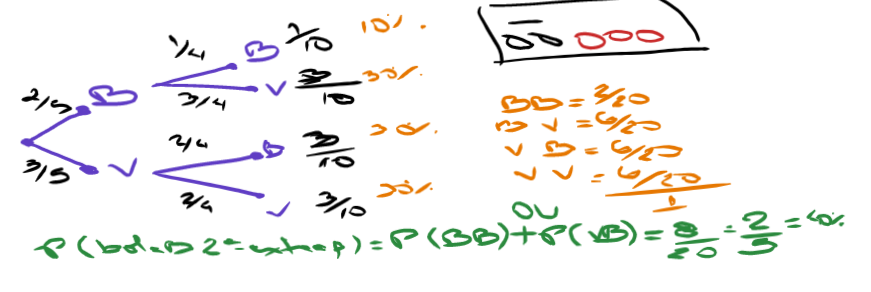

$$P(B) = \frac{2}{5}$$
$$P(V) = \frac{3}{5}$$

$$
P(B \cap B) = \frac{1}{10}
$$
$$P(B \cap V) = \frac{3}{10}$$
$$P(V \cap B) = \frac{3}{10}$$
$$P(V \cap V) = \frac{3}{10}$$

$$P(V | B) = \frac{P(V \cap B)}{P(B)}= (2/5)*(3/4)/(2/5)=3/4$$

**9)**

In [12]:
n = [
    1562409, 733559, 3483985, 450479, 7581051, 669526, 1383445, 6574789,
    3118360, 8452381, 3168027, 3766528, 8796448, 3120494, 2068017, 14016906,
    19597330, 3514952, 15989929, 41262199, 10444526, 6248436, 10693929,
    2449024, 3035122, 6003788, 2570160
]

estado = [
    "Rondônia", "Acre", "Amazonas", "Roraima", "Pará", "Amapá", "Tocantins",
    "Maranhão", "Piauí", "Ceará", "Rio Grande do Norte", "Paraíba",
    "Pernambuco", "Alagoas", "Sergipe", "Bahia", "Minas Gerais",
    "Espírito Santo", "Rio de Janeiro", "São Paulo", "Paraná",
    "Santa Catarina", "Rio Grande do Sul", "Mato Grosso do Sul", "Mato Grosso",
    "Goiás", "Distrito Federal"
]

import pandas as pd

df = pd.DataFrame({'estado': estado, 'populacao': n})

In [13]:
df

,estado,populacao
0,Rondônia,1562409
1,Acre,733559
2,Amazonas,3483985
3,Roraima,450479
4,Pará,7581051
5,Amapá,669526
6,Tocantins,1383445
7,Maranhão,6574789
8,Piauí,3118360
9,Ceará,8452381


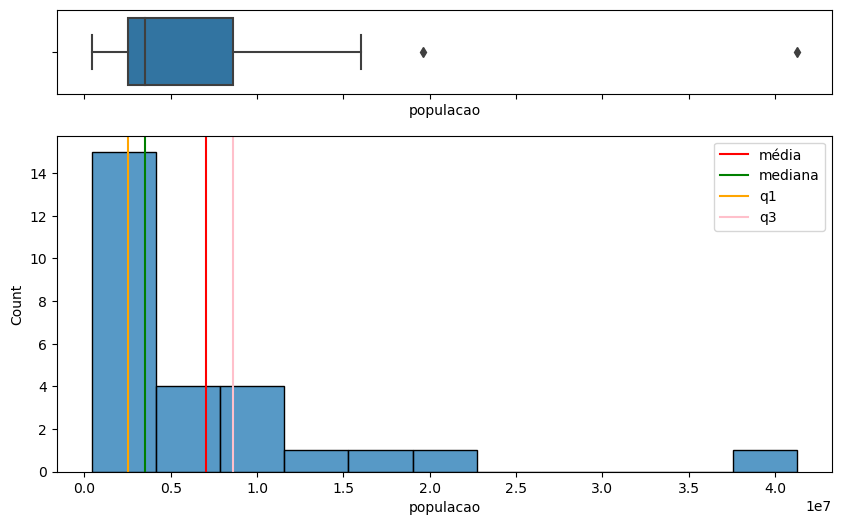

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

f, (ax_box, ax_hist) = plt.subplots(2,
                                    sharex=True,
                                    figsize=(10, 6),
                                    gridspec_kw={"height_ratios": (.2, .8)})

# assigning a graph to each ax
sns.boxplot(x=df.populacao, ax=ax_box)
sns.histplot(df.populacao, ax=ax_hist)
plt.axvline(x=df.populacao.mean(), color="red", label="média")
plt.axvline(df.populacao.median(), color="green", label="mediana")

plt.axvline(df.populacao.quantile(0.25), color="orange", label="q1")
plt.axvline(df.populacao.quantile(0.75), color="pink", label="q3")

plt.legend()
plt.show()

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

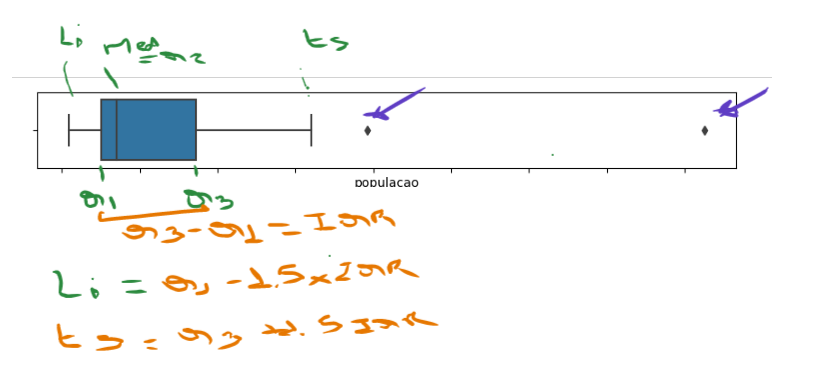

**Séries Temporais**

Uma série temporal pode ser decomposta nos seguintes **componentes**:

- **Tendência (T)**: indica o seu comportamento ao longo do tempo, ou seja, se é **crescente**, **decrescente** ou **estável**. Além disso, a tendência indica também a velocidade destas mudanças. 
<br>
- **Ciclos (C)**: são  **oscilações de subida e de queda nas séries**, de forma **suave e repetida**, ao longo da componente de tendência. Os movimentos cíclicos tendem a ser irregulares.
<br>
- **Sazonalidade (S)**: são **oscilações de subida e de queda que sempre ocorrem em um determinado período do ano, do mês, da semana ou do dia**. Estes movimentos são facilmente previsíveis, ocorrendo em **intervalos regulares de tempo**. 
<br>
- **Ruído Aleatório ($\epsilon$)**: ou erro no período **t** são variações irregulares ou flutuações inexplicáveis, resultado de fatos fortuitos e inesperados.


- A **série é aditiva** se a magnitude da **sazonalidade mantem-se constante** ao longo do prazo; 
- A série é denominada **multiplicativa** se ao longo do tempo a **amplitude da sazonalidade aumenta**


A diferença entre uma série temporal __estacionária__ e __não estacionária__ é que para as séries estacionárias, o valor de __média__ e __variância__ da série é __constante__ ao longo do tempo, diferente do caso das 'series não estacionárias.<br><br>

<img src="https://miro.medium.com/max/2580/1*tkx0_wwQ2JT7pSlTeg4yzg.png" width=800>
<br>